In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_score,f1_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('creditcard.csv')

# 1. Display Top 5 Rows of The Dataset

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 2. Check Last 5 Rows of The Dataset

In [4]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [5]:
data.shape

(284807, 31)

In [6]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 284807
Number of Columns 31


# 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# 5. Check Null Values In The Dataset

In [8]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc = StandardScaler()
data['Amount']=sc.fit_transform(pd.DataFrame(data['Amount']))

In [11]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [12]:
data = data.drop(['Time'],axis=1)

In [13]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [14]:
data.shape

(284807, 30)

In [15]:
data.duplicated().any()

True

# Let's Remove Duplicated Values

In [16]:
data = data.drop_duplicates()

In [17]:
data.shape

(275663, 30)

In [18]:
284807- 275663

9144

# 6.Handling Imbalanced data

In [19]:
data['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt


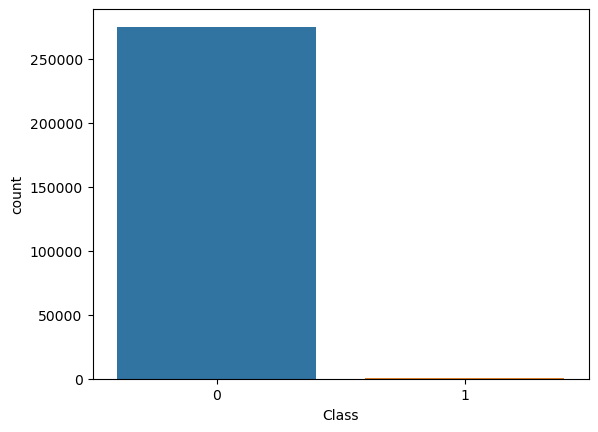

In [21]:
sns.countplot(x='Class', data=data, order=data['Class'].value_counts().index)
plt.show()

# 7. Store Feature Matrix In X And Response (Target) In Vector y

In [22]:
X = data.drop('Class',axis=1)
y = data['Class']

# 8. Splitting The Dataset Into The Training Set And Test Set

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

# 9. Handling Imbalanced Dataset

# Undersampling

In [24]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

In [25]:
normal.shape

(275190, 30)

In [26]:
fraud.shape

(473, 30)

In [27]:
normal_sample=normal.sample(n=473)

In [28]:
normal_sample.shape

(473, 30)

In [29]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)

In [30]:
new_data['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [31]:
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.992612,0.901072,0.888142,0.966378,-0.061128,-0.940619,0.516207,0.094180,-0.301117,0.112192,...,0.100855,0.376558,-0.220956,0.383261,-0.269054,-0.354724,0.050387,-0.151896,-0.200942,0
1,-3.475158,-0.570555,0.182870,0.208770,-5.495370,2.894484,3.061046,-1.942759,-0.446777,-0.307844,...,0.527337,-1.075889,-0.954646,0.723920,-0.309070,-0.640751,0.454532,-1.205767,3.579648,0
2,1.108033,0.262369,-0.062800,1.246383,-0.205795,-1.355922,0.652852,-0.390785,-0.295612,0.012647,...,0.069066,0.079030,-0.170357,0.733909,0.778175,-0.324390,-0.022396,0.027211,-0.044897,0
3,-0.372519,1.277995,1.589455,0.341434,0.022751,-1.128156,0.642116,-0.204966,0.782532,-0.895505,...,-0.385688,-0.769115,0.029131,0.615418,-0.207629,0.011201,0.223133,0.096711,-0.349671,0
4,1.275130,0.445812,-0.128700,1.115360,-0.030971,-1.211879,0.502660,-0.313743,-0.166531,0.066994,...,-0.005147,0.005602,-0.136855,0.386229,0.827236,-0.294045,-0.012905,0.009484,-0.344234,0


In [32]:
X = new_data.drop('Class',axis=1)
y = new_data['Class']

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

# 10. Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [35]:
y_pred1 = log.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_test,y_pred1)

0.9210526315789473

In [38]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [39]:
precision_score(y_test,y_pred1)

0.9393939393939394

In [40]:
recall_score(y_test,y_pred1)

0.9117647058823529

In [41]:
f1_score(y_test,y_pred1)

0.9253731343283583

# 11. Decision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [43]:
y_pred2 = dt.predict(X_test)

In [44]:
accuracy_score(y_test,y_pred2)

0.9

In [45]:
precision_score(y_test,y_pred2)

0.8878504672897196

In [46]:
recall_score(y_test,y_pred2)

0.9313725490196079

In [47]:
f1_score(y_test,y_pred2)

0.9090909090909091

# 12. Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [49]:
y_pred3 = rf.predict(X_test)

In [50]:
accuracy_score(y_test,y_pred3)

0.9263157894736842

In [51]:
precision_score(y_test,y_pred3)

0.9583333333333334

In [52]:
recall_score(y_test,y_pred3)

0.9019607843137255

In [53]:
f1_score(y_test,y_pred3)

0.9292929292929293

In [54]:
final_data = pd.DataFrame({'Models':['Logistic Regression','Decision Tree','Random Forest'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [55]:
final_data

,Models,ACC
0,Logistic Regression,92.105263
1,Decision Tree,90.000000
2,Random Forest,92.631579


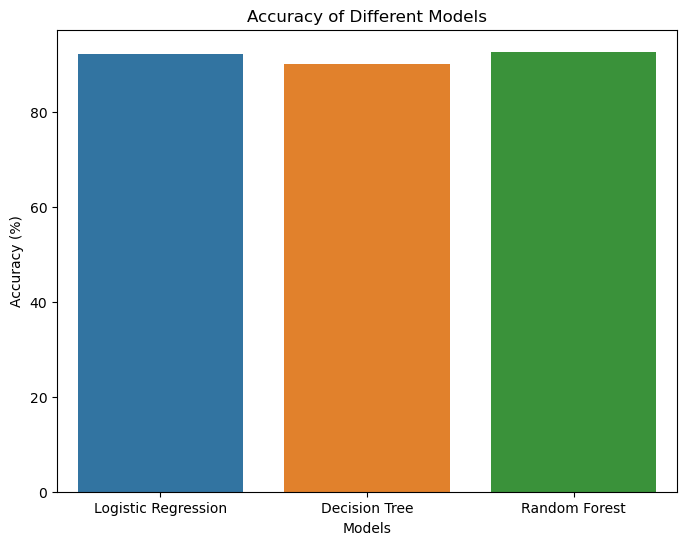

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Models', y='ACC', data=final_data)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Models')
plt.show()

# Oversampling

In [57]:
X = data.drop('Class',axis=1)
y = data['Class']

In [58]:
X.shape

(275663, 29)

In [59]:
y.shape

(275663,)

In [60]:
from imblearn.over_sampling import SMOTE

In [61]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [62]:
y_res.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,
                                                 random_state=42)

# 10. Logistic Regression

In [64]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [65]:
y_pred1 = log.predict(X_test)

In [66]:
accuracy_score(y_test,y_pred1)

0.9446291653039718

In [67]:
precision_score(y_test,y_pred1)

0.9727968756041916

In [68]:
recall_score(y_test,y_pred1)

0.9147682853662528

In [69]:
f1_score(y_test,y_pred1)

0.9428906066994611

# 11. Decision Tree Classifier

In [70]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [71]:
y_pred2 = dt.predict(X_test)

In [72]:
accuracy_score(y_test,y_pred2)

0.9981649042479741

In [73]:
precision_score(y_test,y_pred2)

0.9973318812959434

In [74]:
recall_score(y_test,y_pred2)

0.9990000545424795

In [75]:
f1_score(y_test,y_pred2)

0.9981652709404351

# 12. Random Forest Classifier

In [76]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [77]:
y_pred3 = rf.predict(X_test)

In [78]:
accuracy_score(y_test,y_pred3)

0.9999000690432065

In [79]:
precision_score(y_test,y_pred3)

0.9998000508961356

In [80]:
recall_score(y_test,y_pred3)

1.0

In [81]:
f1_score(y_test,y_pred3)

0.9999000154521575

In [82]:

final_data = pd.DataFrame({'Models':['Logistic Regression','Decision Tree','Random Forest'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100
                    ]})

In [83]:
final_data

,Models,ACC
0,Logistic Regression,94.462917
1,Decision Tree,99.816490
2,Random Forest,99.990007


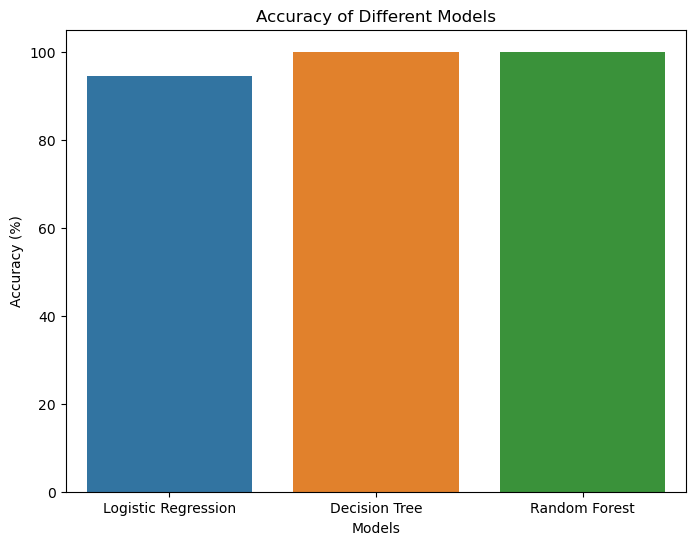

In [84]:
# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Models', y='ACC', data=final_data)

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Models')
plt.show()

# Save The Model

In [85]:
rf1 = RandomForestClassifier()
rf1.fit(X_res,y_res)

RandomForestClassifier()

In [86]:
import joblib

In [87]:
joblib.dump(rf1,"credit_card_model")

['credit_card_model']

In [88]:
model = joblib.load("credit_card_model")

In [89]:
pred = model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

In [90]:
if pred == 0:
    print("Normal Transcation")
else:
    print("Fraudulent Transcation")

Normal Transcation
